# Identifying Crocodiles Using Classification
### Author: Adrian Khlim

In [759]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [760]:
crocodile_data = pd.read_csv("crocodile_dataset.csv")

In [761]:
crocodile_data.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


Checking my features (columns)

In [762]:
crocodile_data.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [763]:
print("\n".join([col for col in crocodile_data.columns]))

Observation ID
Common Name
Scientific Name
Family
Genus
Observed Length (m)
Observed Weight (kg)
Age Class
Sex
Date of Observation
Country/Region
Habitat Type
Conservation Status
Observer Name
Notes


I noticed we have meters and kilograms, so I will convert these into feet and pounds for my American brain to better visualize and understand.

In [764]:
crocodile_data["Observed Length (ft)"] = crocodile_data["Observed Length (m)"] * 3.28084

In [765]:
crocodile_data["Observed Weight (lbs)"] = crocodile_data["Observed Weight (kg)"] * 2.20462

In [766]:
crocodile_data.isnull().sum()

Observation ID           0
Common Name              0
Scientific Name          0
Family                   0
Genus                    0
Observed Length (m)      0
Observed Weight (kg)     0
Age Class                0
Sex                      0
Date of Observation      0
Country/Region           0
Habitat Type             0
Conservation Status      0
Observer Name            0
Notes                    0
Observed Length (ft)     0
Observed Weight (lbs)    0
dtype: int64

In [767]:
crocodile_data.dtypes

Observation ID             int64
Common Name               object
Scientific Name           object
Family                    object
Genus                     object
Observed Length (m)      float64
Observed Weight (kg)     float64
Age Class                 object
Sex                       object
Date of Observation       object
Country/Region            object
Habitat Type              object
Conservation Status       object
Observer Name             object
Notes                     object
Observed Length (ft)     float64
Observed Weight (lbs)    float64
dtype: object

In [768]:
crocodile_data.describe()

,Observation ID,Observed Length (m),Observed Weight (kg),Observed Length (ft),Observed Weight (lbs)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900,7.923589,343.417846
std,288.819436,1.097542,175.186788,3.600861,386.220297
min,1.000000,0.140000,4.400000,0.459318,9.700328
25%,250.750000,1.637500,53.225000,5.372375,117.340899
50%,500.500000,2.430000,100.600000,7.972441,221.784772
75%,750.250000,3.010000,168.875000,9.875328,372.305203
max,1000.000000,6.120000,1139.700000,20.078741,2512.605414


I want to classify based on any statistical data, what kind of crocodile a crocodile is. Thus, their genus will be my classification label, so I want to know what kind of genera (plural for genus, I know it's kind of cool) one is and how many labels I will have.

In [769]:
crocodile_data["Genus"].describe()

count           1000
unique             3
top       Crocodylus
freq             784
Name: Genus, dtype: object

In [770]:
crocodile_data["Genus"].value_counts() 

Genus
Crocodylus     784
Mecistops      111
Osteolaemus    105
Name: count, dtype: int64

Okay, sweet, I have 3 genera:
- Crocodylus
- Mecistops
- Osteolaemus

However, I realized that if this is global crocodile data, this is too little. Looking at the table again, my main label should be the scientific name (or common name).

In [771]:
crocodile_data["Scientific Name"]

0        Crocodylus moreletii
1           Crocodylus acutus
2      Crocodylus intermedius
3        Crocodylus moreletii
4        Crocodylus palustris
                ...          
995         Crocodylus suchus
996          Crocodylus halli
997    Mecistops cataphractus
998    Mecistops cataphractus
999          Crocodylus halli
Name: Scientific Name, Length: 1000, dtype: object

In [772]:
crocodile_data["Scientific Name"].value_counts()

Scientific Name
Crocodylus novaeguineae    68
Crocodylus raninus         67
Crocodylus acutus          66
Crocodylus moreletii       64
Crocodylus rhombifer       59
Crocodylus porosus         58
Crocodylus mindorensis     58
Crocodylus intermedius     58
Osteolaemus tetraspis      57
Mecistops leptorhynchus    56
Mecistops cataphractus     55
Crocodylus suchus          52
Crocodylus halli           49
Osteolaemus osborni        48
Crocodylus niloticus       48
Crocodylus palustris       47
Crocodylus siamensis       45
Crocodylus johnstoni       45
Name: count, dtype: int64

In [773]:
crocodile_data["Common Name"].value_counts()

Common Name
New Guinea Crocodile                         68
Borneo Crocodile (disputed)                  67
American Crocodile                           66
Morelet's Crocodile                          64
Cuban Crocodile                              59
Saltwater Crocodile                          58
Philippine Crocodile                         58
Orinoco Crocodile                            58
West African Dwarf Crocodile                 57
Central African Slender-snouted Crocodile    56
West African Slender-snouted Crocodile       55
West African Crocodile                       52
Hall's New Guinea Crocodile                  49
Congo Dwarf Crocodile                        48
Nile Crocodile                               48
Mugger Crocodile (Marsh Crocodile)           47
Siamese Crocodile                            45
Freshwater Crocodile (Johnstone's)           45
Name: count, dtype: int64

So I have:
- *Crocodylus novaeguineae*, New Guinea Crocodile — 68  
- *Crocodylus raninus*, Borneo Crocodile (disputed) — 67  
- *Crocodylus acutus*, American Crocodile — 66  
- *Crocodylus moreletii*, Morelet's Crocodile — 64  
- *Crocodylus rhombifer*, Cuban Crocodile — 59  
- *Crocodylus porosus*, Saltwater Crocodile — 58  
- *Crocodylus mindorensis*, Philippine Crocodile — 58  
- *Crocodylus intermedius*, Orinoco Crocodile — 58  
- *Osteolaemus tetraspis*, West African Dwarf Crocodile — 57  
- *Mecistops leptorhynchus*, Central African Slender-snouted Crocodile — 56  
- *Mecistops cataphractus*, West African Slender-snouted Crocodile — 55  
- *Crocodylus suchus*, West African Crocodile — 52  
- *Crocodylus halli*, Hall's New Guinea Crocodile — 49  
- *Osteolaemus osborni*, Congo Dwarf Crocodile — 48  
- *Crocodylus niloticus*, Nile Crocodile — 48  
- *Crocodylus palustris*, Mugger Crocodile (Marsh) — 47  
- *Crocodylus siamensis*, Siamese Crocodile — 45  
- *Crocodylus johnstoni*, Freshwater Crocodile (Johnstone’s) — 45  


Now I am thinking that I want to find which features I can likely use to make predictions on. Now from genus, I learned that it kind of gives too much. It cuts the species type by a lot, and I am also thinking region does that too. I am thinking this would make classification too easy. Below, we can see there are countries with only 3 or 7 crocodile types. We can factor region in the future perhaps, but for now lets limit that data.

In [774]:
crocodile_data["Country/Region"].value_counts()

Country/Region
Papua New Guinea            97
Cuba                        77
Philippines                 68
Australia                   54
Venezuela                   47
Malaysia (Borneo)           38
Mexico                      35
Congo (DRC)                 34
Indonesia (Papua)           32
Colombia                    32
Indonesia (Borneo)          29
Cameroon                    28
Congo Basin Countries       27
Côte d'Ivoire               22
Guatemala                   21
Belize                      20
Liberia                     20
Guinea                      17
India                       17
Sierra Leone                17
Ghana                       16
Nigeria                     16
Central African Republic    14
Pakistan                    14
Cambodia                    13
Mali                        12
Tanzania                    12
Vietnam                     11
Iran (historic)             11
Niger                       11
Laos                        11
Sudan                   

In [775]:
print("\n".join([col for col in crocodile_data.columns]))

Observation ID
Common Name
Scientific Name
Family
Genus
Observed Length (m)
Observed Weight (kg)
Age Class
Sex
Date of Observation
Country/Region
Habitat Type
Conservation Status
Observer Name
Notes
Observed Length (ft)
Observed Weight (lbs)


In [776]:
crocodile_data["Age Class"].value_counts()

Age Class
Adult        510
Subadult     247
Juvenile     194
Hatchling     49
Name: count, dtype: int64

Okay, so I think the features I want are going to be:
- Length
- Width
- Age Class
- Sex
- Habitat Type

I think Length and Width are the most important, and age class and sex can give us extra details or consistent differences to differentiate species, and then I believe Habitat could potentially give too much like country, since I think only saltwater crocodiles can live or swim in the ocean. Also, this raises the question of does habitat include the places they live, rest, sleep, or places the travel and frequent as well?

In [777]:
crocodile_data["Habitat Type"].value_counts()

Habitat Type
Rivers                  165
Swamps                  156
Forest Swamps            57
Lakes                    54
Freshwater Wetlands      47
Estuarine Systems        37
Estuaries                34
Mangroves                32
Flooded Savannas         31
Forest Rivers            30
Reservoirs               29
Small Streams            28
Shaded Forest Rivers     28
Large Rivers             27
Marshes                  24
Freshwater Marshes       23
Slow Streams             20
Coastal Lagoons          19
Oases                    17
Billabongs               17
Coastal Wetlands         16
Lagoons                  16
Slow Rivers              15
Gorges                   14
Freshwater Rivers        14
Ponds                    14
Brackish Rivers          13
Oxbow Lakes              13
Tidal Rivers             10
Name: count, dtype: int64

So I can see the number of crocodiles observed to be part of each habitat. I believe this means they were observed there, and not necessarily live there, but they likely go hand in hand. I believe some crocodiles could live in multiple habitats, especially since the habitats listed are specific. 

Now we can clean our dataframe.

In [778]:
features = ["Observed Length (ft)", "Observed Weight (lbs)", "Age Class", "Sex", "Habitat Type"]


crocodile_data_cleaned = crocodile_data[["Scientific Name"] + ["Common Name"] + features]
crocodile_data_cleaned.head()

,Scientific Name,Common Name,Observed Length (ft),Observed Weight (lbs),Age Class,Sex,Habitat Type
0,Crocodylus moreletii,Morelet's Crocodile,6.233596,136.686440,Adult,Male,Swamps
1,Crocodylus acutus,American Crocodile,13.418636,737.445390,Adult,Male,Mangroves
2,Crocodylus intermedius,Orinoco Crocodile,3.543307,260.586084,Juvenile,Unknown,Flooded Savannas
3,Crocodylus moreletii,Morelet's Crocodile,7.939633,199.297648,Adult,Male,Rivers
4,Crocodylus palustris,Mugger Crocodile (Marsh Crocodile),12.303150,593.924628,Adult,Unknown,Rivers


Okay, so I cleaned our data, and I realized I want to link our scientific and common name since to me and the readers, the scientific name may not mean much, but the common name might be familiar or give us an idea on what kind of crocodile is being observed. Lets create a map or dictionary for this.

In [779]:
scientific_names = crocodile_data_cleaned["Scientific Name"].unique()
scientific_names

array(['Crocodylus moreletii', 'Crocodylus acutus',
       'Crocodylus intermedius', 'Crocodylus palustris',
       'Crocodylus siamensis', 'Osteolaemus osborni', 'Crocodylus suchus',
       'Osteolaemus tetraspis', 'Crocodylus niloticus',
       'Crocodylus raninus', 'Crocodylus porosus', 'Crocodylus rhombifer',
       'Crocodylus mindorensis', 'Crocodylus novaeguineae',
       'Mecistops cataphractus', 'Crocodylus johnstoni',
       'Mecistops leptorhynchus', 'Crocodylus halli'], dtype=object)

In [780]:
common_names = crocodile_data_cleaned["Common Name"].unique()
common_names

array(["Morelet's Crocodile", 'American Crocodile', 'Orinoco Crocodile',
       'Mugger Crocodile (Marsh Crocodile)', 'Siamese Crocodile',
       'Congo Dwarf Crocodile', 'West African Crocodile',
       'West African Dwarf Crocodile', 'Nile Crocodile',
       'Borneo Crocodile (disputed)', 'Saltwater Crocodile',
       'Cuban Crocodile', 'Philippine Crocodile', 'New Guinea Crocodile',
       'West African Slender-snouted Crocodile',
       "Freshwater Crocodile (Johnstone's)",
       'Central African Slender-snouted Crocodile',
       "Hall's New Guinea Crocodile"], dtype=object)

In [781]:
name_map = {}

In [782]:
for i, sci_name in enumerate(scientific_names):
    name_map[sci_name] = common_names[i]
name_map

{'Crocodylus moreletii': "Morelet's Crocodile",
 'Crocodylus acutus': 'American Crocodile',
 'Crocodylus intermedius': 'Orinoco Crocodile',
 'Crocodylus palustris': 'Mugger Crocodile (Marsh Crocodile)',
 'Crocodylus siamensis': 'Siamese Crocodile',
 'Osteolaemus osborni': 'Congo Dwarf Crocodile',
 'Crocodylus suchus': 'West African Crocodile',
 'Osteolaemus tetraspis': 'West African Dwarf Crocodile',
 'Crocodylus niloticus': 'Nile Crocodile',
 'Crocodylus raninus': 'Borneo Crocodile (disputed)',
 'Crocodylus porosus': 'Saltwater Crocodile',
 'Crocodylus rhombifer': 'Cuban Crocodile',
 'Crocodylus mindorensis': 'Philippine Crocodile',
 'Crocodylus novaeguineae': 'New Guinea Crocodile',
 'Mecistops cataphractus': 'West African Slender-snouted Crocodile',
 'Crocodylus johnstoni': "Freshwater Crocodile (Johnstone's)",
 'Mecistops leptorhynchus': 'Central African Slender-snouted Crocodile',
 'Crocodylus halli': "Hall's New Guinea Crocodile"}

Now I have a mapping of names to use for later. My data contained no null values and my data types seemed correct. 

Lets visualize some of this data now, and I'll use the common names instead of Scientific names for familiarity. Below I can see there is a specific (likely Saltwater) crocodile that is likely the largest, and some (green, likely dwarf) are smaller.

<Figure size 1200x600 with 0 Axes>

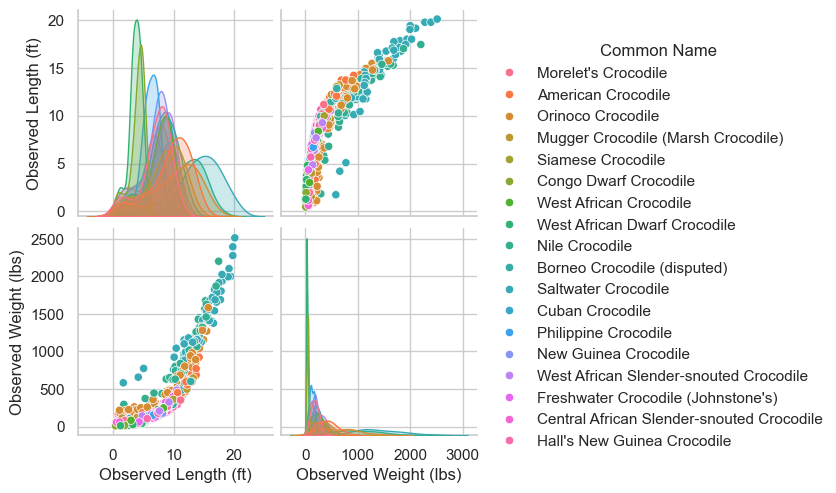

In [783]:
plt.figure(figsize=(12, 6))
sns.pairplot(crocodile_data,
             vars=["Observed Length (ft)", "Observed Weight (lbs)"],
             hue="Common Name")
plt.show()

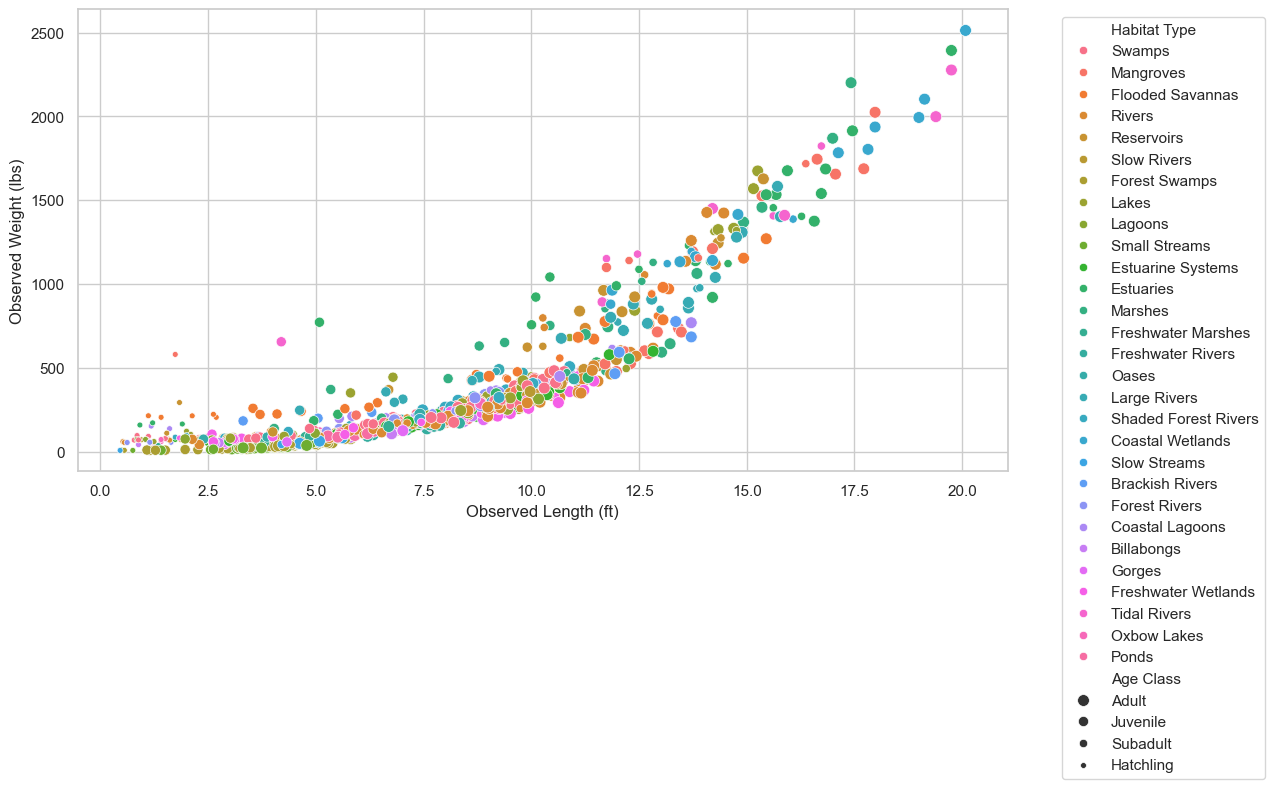

In [784]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=crocodile_data,
    x="Observed Length (ft)", y="Observed Weight (lbs)",
    hue="Habitat Type", size="Age Class"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [785]:
species_by_length = crocodile_data_cleaned.groupby("Common Name")["Observed Length (ft)"].max().sort_values(ascending=False)
species_by_length

Common Name
Saltwater Crocodile                          20.078741
Nile Crocodile                               17.421260
Orinoco Crocodile                            15.780840
American Crocodile                           14.206037
Mugger Crocodile (Marsh Crocodile)           13.221785
Borneo Crocodile (disputed)                  12.828084
Hall's New Guinea Crocodile                  11.450132
West African Slender-snouted Crocodile       11.187664
Morelet's Crocodile                          11.154856
Cuban Crocodile                              11.089239
New Guinea Crocodile                         11.089239
West African Crocodile                       10.990814
Siamese Crocodile                            10.564305
Central African Slender-snouted Crocodile    10.039370
Freshwater Crocodile (Johnstone's)            9.383202
Philippine Crocodile                          8.595801
Congo Dwarf Crocodile                         5.807087
West African Dwarf Crocodile                  5.38057

Now that I know the biggest and smallest crocodiles, lets visualize the three smallest and three biggest and see if I can see any patterns.

In [786]:
largest_three_species = species_by_length.head(3).index.tolist()
smallest_three_species = species_by_length.tail(3).index.tolist()

In [787]:
big_crocs = crocodile_data_cleaned[crocodile_data_cleaned["Common Name"].isin(largest_three_species)]
big_crocs

,Scientific Name,Common Name,Observed Length (ft),Observed Weight (lbs),Age Class,Sex,Habitat Type
2,Crocodylus intermedius,Orinoco Crocodile,3.543307,260.586084,Juvenile,Unknown,Flooded Savannas
17,Crocodylus niloticus,Nile Crocodile,14.337271,1245.610300,Adult,Female,Reservoirs
19,Crocodylus porosus,Saltwater Crocodile,5.085302,773.601158,Juvenile,Male,Estuaries
21,Crocodylus niloticus,Nile Crocodile,15.255906,1675.070276,Adult,Male,Lakes
24,Crocodylus niloticus,Nile Crocodile,10.433071,754.200502,Juvenile,Male,Marshes
...,...,...,...,...,...,...,...
963,Crocodylus intermedius,Orinoco Crocodile,11.089239,684.093586,Adult,Unknown,Flooded Savannas
966,Crocodylus niloticus,Nile Crocodile,15.354331,1458.797054,Adult,Female,Marshes
970,Crocodylus niloticus,Nile Crocodile,6.791339,445.994626,Juvenile,Unknown,Lakes
974,Crocodylus intermedius,Orinoco Crocodile,5.675853,258.381464,Juvenile,Unknown,Flooded Savannas


In [788]:
small_crocs = crocodile_data_cleaned[crocodile_data_cleaned["Common Name"].isin(smallest_three_species)]
smallest_three_species

['Philippine Crocodile',
 'Congo Dwarf Crocodile',
 'West African Dwarf Crocodile']

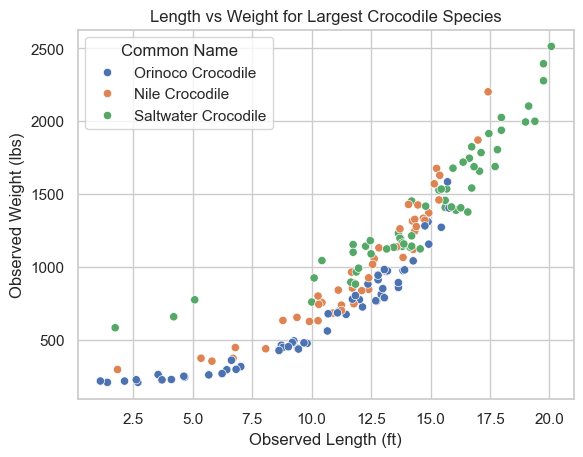

In [789]:
sns.scatterplot(
    data=big_crocs,
    x="Observed Length (ft)",
    y="Observed Weight (lbs)",
    hue="Common Name"
)
plt.title("Length vs Weight for Largest Crocodile Species")
plt.show()

Here I've visualized the three species of crocs with the largest lengths. I realized the trend and chart is going to look similar when using both Weight and Length, so what if I keep one of those features and include Age Class?

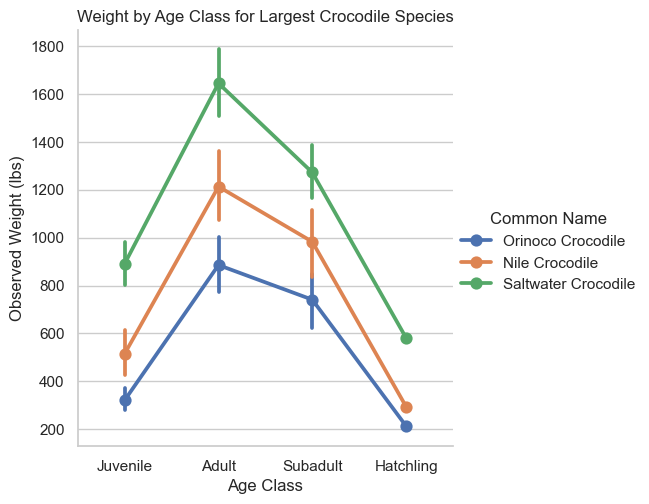

In [790]:
sns.set_theme(style="whitegrid")
sns.catplot(
    data=big_crocs,
    kind="point", # yay a solid one thats easy to read
    x="Age Class",
    y="Observed Weight (lbs)",
    hue="Common Name"
)
plt.title("Weight by Age Class for Largest Crocodile Species")
plt.show()

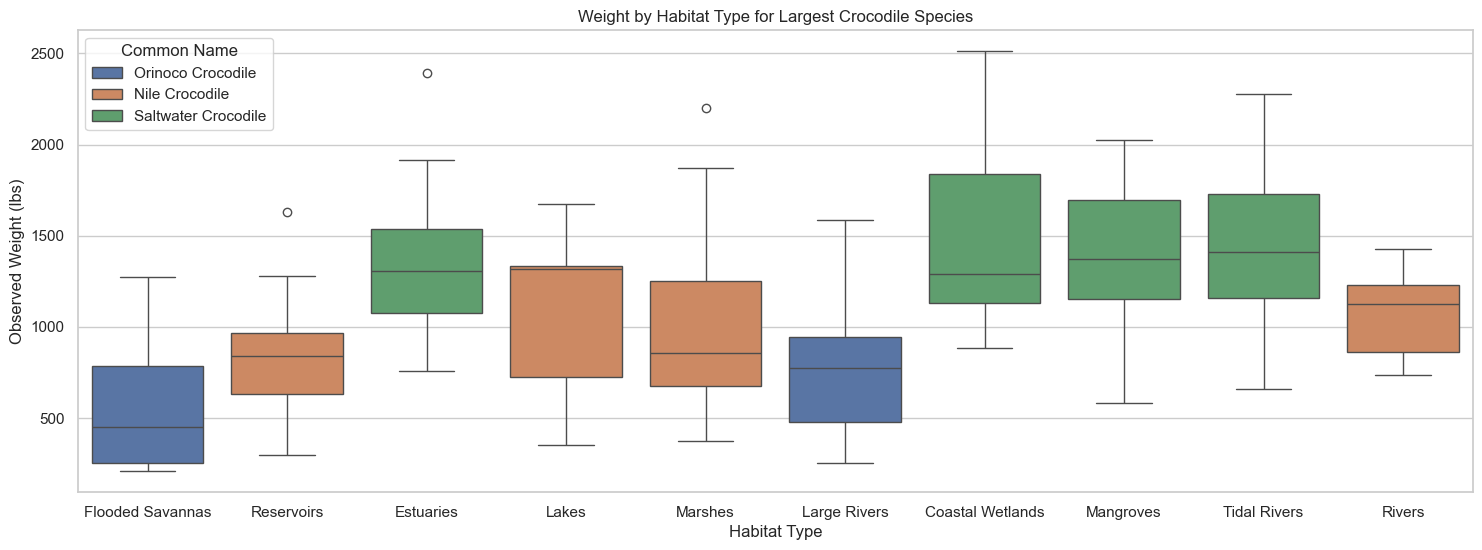

In [791]:
plt.figure(figsize=(18, 6))
sns.boxplot(
    data=big_crocs,
    x="Habitat Type",
    y="Observed Weight (lbs)",
    hue="Common Name"
)
plt.title("Weight by Habitat Type for Largest Crocodile Species")
plt.show()

Now lets split my data into my X (features) and y (label) so we can start evaluating and training our model.

In [792]:
X = crocodile_data_cleaned[features]
y = crocodile_data_cleaned["Common Name"]

In [793]:
X

,Observed Length (ft),Observed Weight (lbs),Age Class,Sex,Habitat Type
0,6.233596,136.686440,Adult,Male,Swamps
1,13.418636,737.445390,Adult,Male,Mangroves
2,3.543307,260.586084,Juvenile,Unknown,Flooded Savannas
3,7.939633,199.297648,Adult,Male,Rivers
4,12.303150,593.924628,Adult,Unknown,Rivers
...,...,...,...,...,...
995,8.366142,247.578826,Adult,Female,Lakes
996,7.447507,177.030986,Subadult,Female,Freshwater Wetlands
997,7.677166,206.131970,Adult,Male,Swamps
998,9.251969,325.401912,Adult,Male,Shaded Forest Rivers


In [794]:
y

0                         Morelet's Crocodile
1                          American Crocodile
2                           Orinoco Crocodile
3                         Morelet's Crocodile
4          Mugger Crocodile (Marsh Crocodile)
                        ...                  
995                    West African Crocodile
996               Hall's New Guinea Crocodile
997    West African Slender-snouted Crocodile
998    West African Slender-snouted Crocodile
999               Hall's New Guinea Crocodile
Name: Common Name, Length: 1000, dtype: object

Now I will evaluate how my model generalizes.

In [795]:
from sklearn.model_selection import train_test_split

When trying to fit the training data to the model I got an error saying some fields are still strings and not floats. I forgot I must also somehow convert my data to be numerical. 

Thus, it's time to encode, then split the data.

In [796]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,Observed Length (ft),Observed Weight (lbs),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,Habitat Type_Coastal Wetlands,...,Habitat Type_Oxbow Lakes,Habitat Type_Ponds,Habitat Type_Reservoirs,Habitat Type_Rivers,Habitat Type_Shaded Forest Rivers,Habitat Type_Slow Rivers,Habitat Type_Slow Streams,Habitat Type_Small Streams,Habitat Type_Swamps,Habitat Type_Tidal Rivers
0,6.233596,136.686440,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,13.418636,737.445390,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.543307,260.586084,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7.939633,199.297648,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,12.303150,593.924628,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [797]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, train_size=0.8, random_state=42, stratify=y)

In [798]:
X_train.shape, X_test.shape

((800, 35), (200, 35))

In [799]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

Let's make predictions and evaluate the model.

In [800]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6950

Classification Report:
                                           precision    recall  f1-score   support

                       American Crocodile       0.87      1.00      0.93        13
              Borneo Crocodile (disputed)       0.42      0.62      0.50        13
Central African Slender-snouted Crocodile       0.58      0.64      0.61        11
                    Congo Dwarf Crocodile       0.80      0.80      0.80        10
                          Cuban Crocodile       0.43      0.25      0.32        12
       Freshwater Crocodile (Johnstone's)       1.00      0.89      0.94         9
              Hall's New Guinea Crocodile       0.50      0.40      0.44        10
                      Morelet's Crocodile       0.47      0.54      0.50        13
       Mugger Crocodile (Marsh Crocodile)       0.58      0.78      0.67         9
                     New Guinea Crocodile       0.54      0.50      0.52        14
                           Nile Crocodile    

Looks like the Cuban Croc, Borneo Croc, New Guinea Croc, and the Hall's New Guinea Croc have pretty bad F1-scores. This could be because of very similar features like size and habitats, or not enough training data/samples.

Running this with Country/Region shows very high scores, which was expected. 

In [801]:
model.get_depth(), model.get_n_leaves()

(24, 238)

In [802]:
results = X_test.copy()
results["True Species"] = y_test.values
results["Predicted Species"] = y_pred

results.head(10)


,Observed Length (ft),Observed Weight (lbs),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,Habitat Type_Coastal Wetlands,...,Habitat Type_Reservoirs,Habitat Type_Rivers,Habitat Type_Shaded Forest Rivers,Habitat Type_Slow Rivers,Habitat Type_Slow Streams,Habitat Type_Small Streams,Habitat Type_Swamps,Habitat Type_Tidal Rivers,True Species,Predicted Species
202,1.837270,295.198618,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,Nile Crocodile,Nile Crocodile
886,6.758530,108.687766,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Freshwater Crocodile (Johnstone's),Freshwater Crocodile (Johnstone's)
106,7.480315,231.044176,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,West African Crocodile,West African Crocodile
327,9.842520,287.261986,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Borneo Crocodile (disputed),Borneo Crocodile (disputed)
166,17.979003,1936.979132,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,Saltwater Crocodile,Saltwater Crocodile
522,11.843832,881.186614,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,Saltwater Crocodile,Saltwater Crocodile
979,9.055118,267.199944,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,West African Crocodile,West African Crocodile
525,6.397638,152.559704,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Central African Slender-snouted Crocodile
892,8.333334,172.401284,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Freshwater Crocodile (Johnstone's),Freshwater Crocodile (Johnstone's)
340,10.006562,414.468560,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,American Crocodile,American Crocodile


In [803]:
crocodile_data.groupby("Common Name")["Observed Length (ft)"].mean().sort_values(ascending=False)


Common Name
Saltwater Crocodile                          14.461151
Nile Crocodile                               12.029747
Orinoco Crocodile                             9.914359
American Crocodile                            9.444345
Mugger Crocodile (Marsh Crocodile)            9.251969
Borneo Crocodile (disputed)                   8.259882
West African Slender-snouted Crocodile        8.109043
Hall's New Guinea Crocodile                   7.879372
West African Crocodile                        7.662654
Cuban Crocodile                               7.604876
Siamese Crocodile                             7.074949
Morelet's Crocodile                           7.057394
New Guinea Crocodile                          7.038849
Central African Slender-snouted Crocodile     6.548205
Freshwater Crocodile (Johnstone's)            6.060805
Philippine Crocodile                          6.041837
Congo Dwarf Crocodile                         4.031332
West African Dwarf Crocodile                  3.67569

In [804]:
crocodile_data.groupby("Common Name")["Observed Weight (lbs)"].mean().sort_values(ascending=False)


Common Name
Saltwater Crocodile                          1399.150680
Nile Crocodile                               1005.219454
Orinoco Crocodile                             652.012564
American Crocodile                            416.673180
Mugger Crocodile (Marsh Crocodile)            355.478558
West African Slender-snouted Crocodile        286.680768
Borneo Crocodile (disputed)                   260.108965
West African Crocodile                        248.303807
Siamese Crocodile                             229.976160
Cuban Crocodile                               219.086915
Hall's New Guinea Crocodile                   212.678342
Central African Slender-snouted Crocodile     203.080933
Morelet's Crocodile                           187.358253
New Guinea Crocodile                          177.283869
Philippine Crocodile                          129.414995
Freshwater Crocodile (Johnstone's)            120.200782
Congo Dwarf Crocodile                          43.605546
West African Dwarf 

Trying to see why the Cuban Croc has such a terrible score. It shares a very similar mean average length as the  West African Crocodile by .06, and there are many crocodiles in the 7 foot average range. It also shares similar mean weights with many crocs, noticeably Hall's New Guinea by 7 lbs, and again the West African Crocodile by almost 30 and the Siamese by 10. 


In [805]:
cuban_true_results = results[
    (results["True Species"] == "Cuban Crocodile")
]
cuban_true_results

,Observed Length (ft),Observed Weight (lbs),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,Habitat Type_Coastal Wetlands,...,Habitat Type_Reservoirs,Habitat Type_Rivers,Habitat Type_Shaded Forest Rivers,Habitat Type_Slow Rivers,Habitat Type_Slow Streams,Habitat Type_Small Streams,Habitat Type_Swamps,Habitat Type_Tidal Rivers,True Species,Predicted Species
525,6.397638,152.559704,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Central African Slender-snouted Crocodile
592,1.509186,80.909554,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Central African Slender-snouted Crocodile
23,8.005250,237.878498,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Siamese Crocodile
626,9.251969,258.822388,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Cuban Crocodile,Hall's New Guinea Crocodile
312,4.954068,130.293042,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,West African Slender-snouted Crocodile
336,6.364830,157.850792,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,West African Slender-snouted Crocodile
104,9.612861,324.960988,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Cuban Crocodile
562,9.055118,278.443506,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Morelet's Crocodile
529,9.481628,331.133924,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Cuban Crocodile,Cuban Crocodile
818,6.955381,175.267290,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Central African Slender-snouted Crocodile


In [806]:
cuban_pred_results = results[
    (results["Predicted Species"] == "Cuban Crocodile")
]

cuban_pred_results

,Observed Length (ft),Observed Weight (lbs),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,Habitat Type_Coastal Wetlands,...,Habitat Type_Reservoirs,Habitat Type_Rivers,Habitat Type_Shaded Forest Rivers,Habitat Type_Slow Rivers,Habitat Type_Slow Streams,Habitat Type_Small Streams,Habitat Type_Swamps,Habitat Type_Tidal Rivers,True Species,Predicted Species
410,5.839895,122.576872,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,New Guinea Crocodile,Cuban Crocodile
273,8.759843,262.129318,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Morelet's Crocodile,Cuban Crocodile
728,8.169292,215.832298,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Hall's New Guinea Crocodile,Cuban Crocodile
502,7.874016,216.052760,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,Central African Slender-snouted Crocodile,Cuban Crocodile
104,9.612861,324.960988,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Cuban Crocodile
529,9.481628,331.133924,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,Cuban Crocodile,Cuban Crocodile
354,9.580053,307.324028,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,Cuban Crocodile,Cuban Crocodile


We can see that the model predicts Cuban Crocodile twice when it was Hall's New Guinea, New Guinea Once, Morelet's and Central African Slender-Snouted and Siamese once, and only once was it right where it was Cuban.

We also see that when it was truly a Cuban Crocodile, the model guessed it was Hall's New Guinea three times, and New Guinea and West African Slender-snouted Crocodile and Siamese twice, all which had similar means for length and weight.

We also see that the Habitat is usually the swamp for most of these.

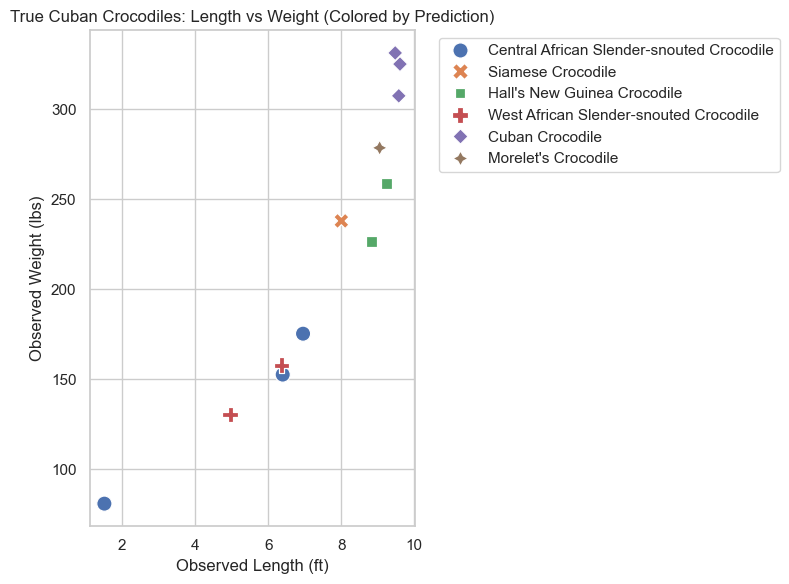

In [807]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cuban_true_results,
    x="Observed Length (ft)",      
    y="Observed Weight (lbs)",     
    hue="Predicted Species",
    style="Predicted Species",
    s=120
)
plt.title("True Cuban Crocodiles: Length vs Weight (Colored by Prediction)")
plt.xlabel("Observed Length (ft)")
plt.ylabel("Observed Weight (lbs)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

So we know that when the species was actually a Cuban Crocodile, our model does terribly. This means the Cuban Crocodile is not a clearly separated cluster. There is no real separation from this Crocodile from a few others because the traits overlap and blend too much. This results in false positives, or terrible precision. 

Using a decision tree, it may have been too simple, and now we have found some issues. I think using Random Forest or KNN would help handling overlapping clusters or species like this better.

Let's do KNN since that's the one I'm most familiar with.  I have a custom version of some methods from my ML class, however I'll use sklearn methods as it will be easier, using AI to help me along the way.

In [808]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, train_size=0.8, random_state=42, stratify=y)

In [809]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# I can use a Pipeline object to automatically do scaler.fit_transform and knn.fit when we call the pipeline object .fit(), and similarly for .predict()
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)


In [810]:
knn_acc = accuracy_score(y_test, y_pred_knn)   
knn_class_report = classification_report(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc}")
print(f"KNN Classification Report:\n{knn_class_report}")

KNN Accuracy: 0.675
KNN Classification Report:
                                           precision    recall  f1-score   support

                       American Crocodile       0.76      1.00      0.87        13
              Borneo Crocodile (disputed)       0.53      0.69      0.60        13
Central African Slender-snouted Crocodile       0.45      0.82      0.58        11
                    Congo Dwarf Crocodile       1.00      0.80      0.89        10
                          Cuban Crocodile       0.60      0.50      0.55        12
       Freshwater Crocodile (Johnstone's)       0.80      0.89      0.84         9
              Hall's New Guinea Crocodile       0.31      0.40      0.35        10
                      Morelet's Crocodile       0.42      0.38      0.40        13
       Mugger Crocodile (Marsh Crocodile)       0.71      0.56      0.62         9
                     New Guinea Crocodile       0.25      0.21      0.23        14
                           Nile Crocodi

We get the highest KNN accuracy at 3 neighbors. Our accuracy is worse than with Deicision Trees, so I am thinking there isn't enough sample data or maybe features overlap way too much. Precision has gone down for the American Croc and the Central African Croc and the Freshwater Croc, all which were relatively high. Westr African and West African Dwarf and Slender-Snouted did take an increase though.

Reference
https://www.kaggle.com/datasets/zadafiyabhrami/global-crocodile-species-dataset 

Acknowledgements: I acknowledge that I did use AI (Github Copilot and ChatGPT) to help with the model training processing and imports/method usage. 